# Computer Lab 5

## 1. Solving linear equations in python

First, we revisit some of the ideas from the previous lab

______

Let's start with a problem from the course notes: Solve
$$
\begin{align*}
2x + y - z &= 2\\
x + 3y +2z & = 1\\
x + y + z & = 2.
\end{align*}
$$
The solution to this system of equations is $x = 2, y = -1, z = 1$.

We can define $A$ and $\mathbf{b}$ in `numpy` as follows.




In [ ]:
import numpy as np

A = np.array([[2,1,-1], [1,3,2], [1,1,1]])
b = np.array([2,1,2])

Now we can find the answer for the system of equations using `np.linalg.inv` and `np.matmul`:

In [ ]:
np.matmul(np.linalg.inv(A),b)

_____



But what if I told you there was a better way. We touched on this last time, but we can use `np.linalg.solve` to find the solution. Go on and run it to check.

In [ ]:
np.linalg.solve(A,b)

We should get the same answer. But why are there two ways of doing the same thing??

`np.linalg.inv` requires us to invert the matrix (which is really painful and slow), whereas `np.linalg.solve` will just do the row reductions required to find the solution! This makes it much faster.

To prove this to you we're gonna use some cell magics in jupyter. The \% let's you do some magic, here we will use it to time some code. Let's make a big matrix.

In [ ]:
big_A = np.identity(500)
big_b = np.ones(500)

We're now going to get an average time of how long it takes to run our two different methods.

In [ ]:
%time answer = np.linalg.solve(big_A,big_b);

In [ ]:
%time answer = np.matmul(np.linalg.inv(big_A),big_b)

Which one took longer? If you're interested, try doubling the size and see how long it takes.

## When Things Go Wrong ... 

Let $C = \begin{bmatrix} 3 & 1 & 0 \\ 2 & 0 & -3 \\
5 & 1 & -3 \end{bmatrix}$. Try using both methods above to solve $C\mathbf{x} = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$ and see what happens. 
First try the inverse. 

Python should give you an inverse and you can use it to get a solution. Check your solution by substituting back into the equation and see what happens. 

It does not give the answer you expect which means that the supposed solution is not really a solution. What went wrong? (Hint: try calculating the determinant of $C$)

In [ ]:

# the answer is suspiciously small! It looks like it should be zero (which we can very direc
# inverse does not actually exist, but Numpy came up with one due to rounding errors

Now try again with solve: 

You should find that you get the same wrong solution - so you have to be very careful. A useful trick is calculate the rank - we don't need to define this, it is just useful to know that it is more accurate than the determinant, and if the rank is less than the size of a square matrix then it is not invertible

In [ ]:
np.linalg.matrix_rank(C)

Now, for the same matrix $C$, try to solve $C\mathbf{x} = \begin{bmatrix} 1 \\ -3 \\ -2 \end{bmatrix}$. 
The inverse method still does not work, but try the solve command, and then check your answer by multiplying by $C$. 

You should find that this time it does give a solution. 
What is going on is that when $C$ is not invertible you may get no solutions or infinitely many. In the previous case there were none, so the solution produced as a result of rounding errors was just wrong. In this case there are infinitely many and the solve command finds one of them - so it does give a correct answer, but not the complete solution. 

To properly deal with non-invertible matrices, including non-square matrices, we need symbolic algebra. There are ways of doing this in Python but generally they are not as reliable as more deidicated mathematical software (such as Matlab or Maple), the problem is that carrying out row operations is very sensitive to rounding issues in floating point arithmetic - it makes a big difference whether something is zero or not, so this is generally a difficult problem, but typically we only need to solve systems with unique solutions, or else there are other ways around the problem which we will see soon. 



## 3. A small PageRank example

PageRank is an algorithm for ranking nodes in a network, most famously used as a basis for Google's ranking of internet search results. 
We will start with a very small example so we can see how it relates to solving systems of equations. 

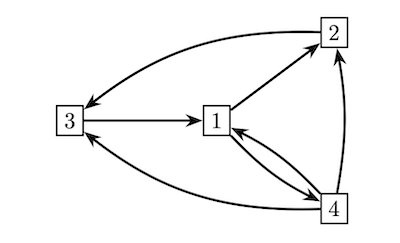

Consider the network shown above. We want to rank each node based on the incoming links it receives, with each contributing the score of the node it comes from, however we want to weight outgoing links according to how many go out from each node. For example if a node has only 1 link going out it has a weighting of 1, but if it has 2 then each has a weighting of 1/2. This weighting is then multiplied by the score of the node. 
We'll let $x_i$ be the score of node $i$ which is calculated by adding up the weights of all incoming links. 
Then we have a system of equations:
$$
\begin{aligned} 
x_1 &=x_3  +\frac{1}{3}x_4 \\
x_2 &= \frac{1}{2}x_1 +\frac{1}{3}x_4 \\
x_3 &=  x_2  +\frac{1}{3}x_4\\
x_4 &= \frac{1}{2}x_1
\end{aligned}
$$

We can represent this as $\mathbf{x} = M \mathbf{x}$ where $\mathbf{x} = (x_1,x_2,x_3,x_4)^T$. 

Enter the matrix $M$ below:

Now to solve $M \mathbf{x} = \mathbf{x}$ it is easier to solve $(M-I)\mathbf{x} = \mathbf{0}$. 
Do this using what we learnt in part 1. 
In particular you should not be typing in an identity matrix - use the command that creates one!
The page of Numpy Array creation routines might also be helpful https://numpy.org/doc/stable/reference/routines.array-creation.html

In [ ]:
# solve for x here 


You should find that the answer is zero - which is of course a solution to $M\mathbf{x} = \mathbf{x}$, but not a very useful one. To investigate if there any more, try the rank. Remember that if this is less than the size of the matrix then it tells us it is not invertible, which means there is not a unique solution - in general it means there might be no solution or infinitely many of them, but given that we have already seen that there is one solutions (the zero solution), then we must have infinitely many here. 

It is possible to row reduce a matrix with Python, though generally row reduction does not work well with numerical techniques, since each step depends heavily on whether or not a particular entry of the matrix is zero, then it runs into major trouble with floating point rounding errors, so typically other methods are used which are more robust to numerical calculations. We will see one shortly, but first we can see that if careful we can do row reduction using symbolic algebra. 

We will use the sympy package. The main point to be careful of is that if the entries are treated as floating point numbers, we will have trouble with rounding errors. As such we can't just use the matrix we already defined with numpy, we need to define it again in sympy and enclose it with a special S function which tells it to treat everything symbolically. 

In [ ]:
from sympy import *
#here is an example of how to define a matrix with rational entries treated symbolically
A= S("Matrix([[1/2, 1],[-2,1/3]])")

# now use the same syntax to redefine your matrix M - you should be able to cut and paste from your numpy definition above. 
# we give it the new name Ms, because we'll need to use our numpy-defined M later on
Ms = 

#Next we define a new matrix Ns = Ms-I by subtracting the identity. In sympy the n x n identity is called eye(n) 
Ns=

# if you print Ns, it should have rational entries, not decimals
print(Ns)

In [ ]:
# now we do the row reduction 

Nrref = Ns.rref()
print(Nrref)

The answer should be the row reduced matrix, followed by another vector lists the positions of the pivots (counting from 0). Remember that here we are solving the system $N\mathbf{x} = \mathbf{0}$, so you should now be able to find the solutions and determine the ranking of the nodes. 


Fortunately there is another way to do this problem which works better numerically. It is not a general way of solving such systems, but it is particular to ones of the form $M \mathbf{x} = \mathbf{x}$

In [ ]:
results = np.linalg.eig(M)
v = results[1][:,0].real
v

The end result of this is to give a non-zero solution to $M \mathbf{x} = \mathbf{x}$.   
What are we actually doing? We are using eigenvalues and eigenvectors - but we won't learn about those until section 6, so this is motivation to be interested in them when we get to them. 
For now we just want to interpret the result. 
We have one non-zero solution - is it the one we want? It doesn't matter, we are just ranking the 4 nodes, so all we are interested in is the relative size, it turns out that all solutions are scalar multiples of this one, so it doesn't matter which one we choose. 

In [ ]:
# Test that it is indeed a solution by calculating Mv

np.matmul(M,v)

Why does it look different to the earlier solution? If $\mathbf{x}$ is a solution to $M\mathbf{x} = \mathbf{x}$ then 
so is any multiple $t\mathbf{x}$. How can we test if these are multiples of each other? 

## 4. Polynomial Fitting 

Suppose I want to fit a polynomial to particular data points. If I have $n$ data points then there is a unique degree $n-1$ polynomial which passes through those points. For example if you have two points, there is a unique line passing through them. 
Suppose we want to fit a polynomial to $(-1,2),(1,0),(2,1),(3,1)$. 
Then we are looking for a degree 3 polynomial, $p(x) = a + bx + cx^2 + dx^3$. 

By substituting in each point to the polynomial create a system of linear equations in the unknowns a, b, c, d and then use Python to solve that system. 
Plot the polynomial to see what it looks like as well. 

To define the polynomial you will need to use the answers you get from the solution of the system of equations. 
One way to do this is that if you have a vector x, you can extract entries from it with x[0], x[1] and so on. Note that indexing starts from 0. 


You can enter your equations in this text box:






In [ ]:
# solve the system here 


In [ ]:
# plot the polynomial here 
